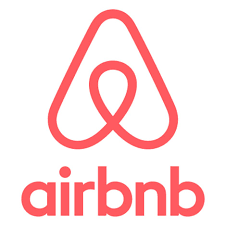

# NYC AirBnB Price Prediction for Hosts 


****

**Contents**

1. [Introduction & Abstract](#Introduction-&-Abstract)
2. [Cleaning Data](#Cleaning-Data)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Univariate](#Univariate)
    - [Bivariate](#Bivariate)
    - [Multivariate](#Multivariate)
4. [Machine Learning](#Machine-Learning)
    - [Linear Regression](#Linear-Regression)
    - [Gradient Boosted Regressor Model](#Gradient-Boosted-Regressor-Model)
5. [Results](#Results)
6. [Conclusion](#Conclusion)

****

## Introduction & Abstract <a id='Introduction-&-Abstract'></a>
<br>
Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 81,000 cities and 191 countries worldwide. The company's name comes from "air mattress B&B.”

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019. This public dataset is part of Airbnb, and the original source can be found on this website.

To start with, you should have a dataset. There are many sources on the internet where you can download datasets from. In this tutorial, we are using the Airbnb's New York city dataset.

The dataset is taken from Kaggle and the link for it is https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

This is the first step in Data analysis and it is extremely important that we understand what columns our dataset has and how many of them are necessary to reach the goal of the project. This brings us to understnding the problem statement of our project. We are using this dataset to focus on the host's point of view. If you are a host and you have a home in New York City that you wish to rent out to travellers, Airbnb gives you the platform. Our problem statement is to predict the price of a particular home at a specific location in New York City, so that it helps the host in setting a price for his/her home. This will be done taking various factors into consideration.

****

# Cleaning Data

It is commonly said that data scientists spend 80% of their time cleaning and manipulating data, and only 20% of their time actually analyzing it.
Before we dive into code, it’s important to understand the sources of missing data.  Here’s some typical reasons why data is missing:

1 User forgot to fill in a field.

2 Data was lost while transferring manually from a legacy database.

3 There was a programming error.

4 Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

As you can see, some of these sources are just simple random mistakes.  Other times, there can be a deeper reason why data is missing.

In [4]:
#Here we are importing relevant libraries for this tutorial.
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
%matplotlib inline

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib

plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [5]:
# Load the data into DataFrames
airbnb = pd.read_csv('MAYA_NYC_2019.csv')

In [6]:
#Here we can see the first 5 entries from the data set.
airbnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
#This gives us the summary of the dataset
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [8]:
#Here we can see the number of rows and columns
airbnb.shape

(48895, 16)

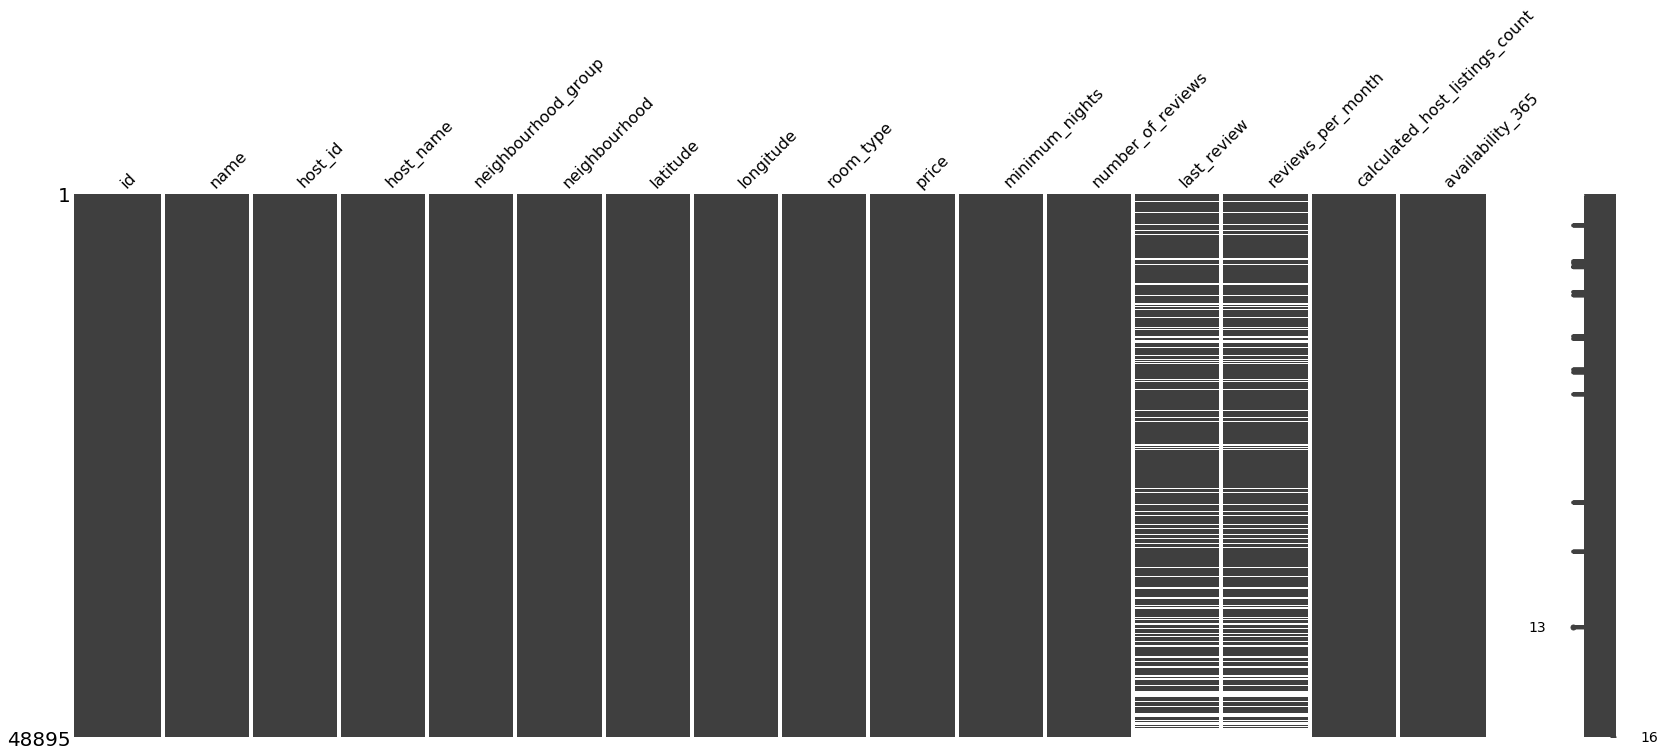

In [9]:
#From this graph we can visualize which column has missing values.
!pip install missingno
import missingno as msno
msno.matrix(airbnb)


In [10]:
#Here we are finding the missing values are there in each column of the dataset.
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
#Here, price being 0 is unrealistic. So we will remove the rows where price is 0. 
#For this, we have to first check for the number of rows where price is 0. 
#If it is less than 10% of the total rows of our dataset, we can remove them.

#Printing Number of rows which has price Zero
print(sum(airbnb['price'] == 0))

11


In [13]:
# Filtering the Price Data
airbnb=airbnb[airbnb['price']>0]

In [14]:
# Minimum_nights being greater than 365 is unrealistic. So we will remove the rows where minimum_nights is greater than 365. 
# For this, we have to first check for the number of rows where minimum_nights is greater than 365.

print(sum(airbnb['minimum_nights'] > 365))

14


In [15]:
# Filtering the Minimum Nights Data
airbnb=airbnb[airbnb['minimum_nights']<=365]

In [16]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.887000e+04,4.887000e+04,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,38827.000000,48870.000000,48870.000000
mean,1.901848e+07,6.762985e+07,40.728952,-73.952172,152.759402,6.840311,23.277143,1.373286,7.146286,112.728443
std,1.098393e+07,7.862005e+07,0.054534,0.046163,240.199363,16.453077,44.556389,1.680465,32.960753,131.596499
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.821708e+06,40.690093,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967676e+07,3.080150e+07,40.723080,-73.955690,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915342e+07,1.074344e+08,40.763127,-73.936280,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


In [17]:
airbnb.reset_index(drop=True,inplace=True)

In [18]:
#We are dropping the duplicate values.
airbnb.drop_duplicates(subset=None, keep='first', inplace=False)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [19]:

#Here we are replacing all missing values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#This shows that the missing values are replaced
airbnb.reviews_per_month.isnull().sum()

0

In [20]:
#Since there missing values in last review column, and we are not using last review for further analysis , we prefer dropping the column.

airbnb.drop(['last_review','name','host_name'], axis=1, inplace=True)

In [21]:
#From the below table we can see that the last review table is dropped.
airbnb.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [22]:
#Now that the data has been cleaned , let us see some unique values of columns which we will require for analysis.

airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [28]:
roomType_DF=airbnb.groupby('room_type').id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'id':'number_Of_Listings'})
roomType_DF

,room_type,number_Of_Listings
0,Entire home/apt,25398
1,Private room,22315
2,Shared room,1157


In [23]:
airbnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [24]:
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a way for data analysis that states a variety of techniques,mainly graphical.

1) Maximize the insights into a particular data set

2) Detection of outliers and anomalies

3) Extraction of the important variables

4) Testing of the underlying assumptions

# Univariate

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

In [25]:
#Let us find the most preferred room type.
max_roomtype=airbnb.room_type.value_counts()
max_roomtype

Entire home/apt    25398
Private room       22315
Shared room         1157
Name: room_type, dtype: int64

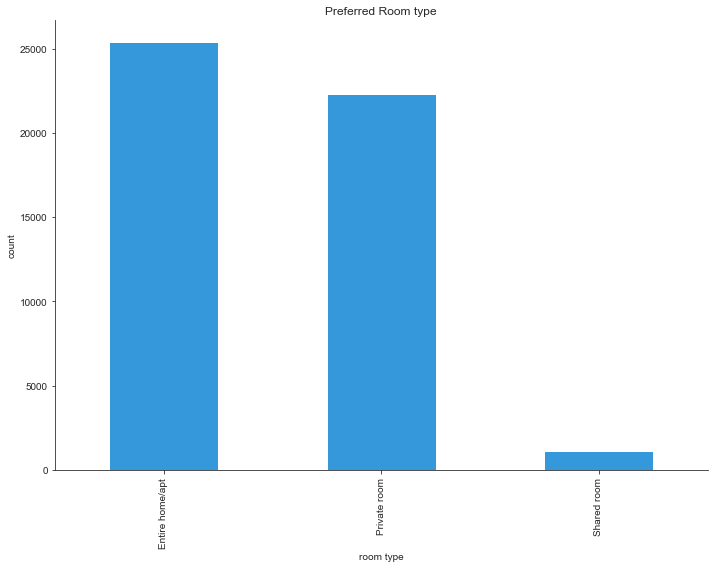

In [26]:
#Here we are using a bar graph to visualze the most preferred room type.
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
max_roomtype.plot(kind='bar',color='#3498DB')
plt.xlabel('room type')
plt.ylabel('count')
plt.title('Preferred Room type')
sns.despine()

In [29]:
#Let us find the most preferred neighbourhood.
pref_neigh=airbnb.neighbourhood_group.value_counts()
pref_neigh

Manhattan        21654
Brooklyn         20089
Queens            5664
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

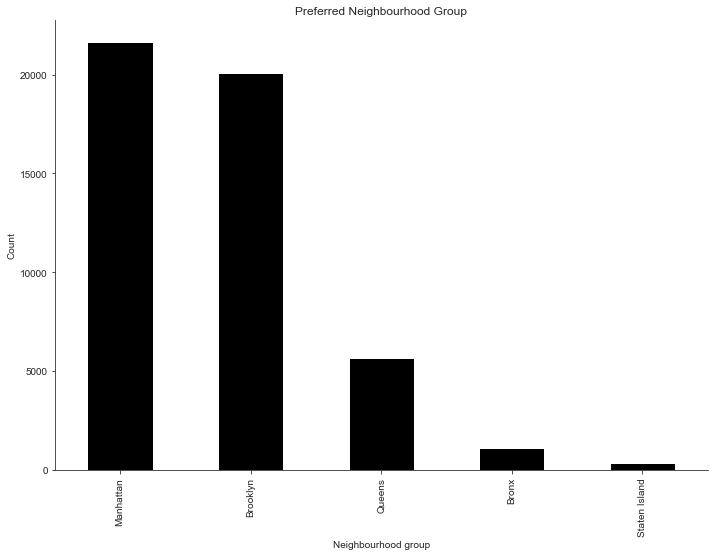

In [30]:
#Here we are using a bar graph to visualze the most preferred neighbourhood group type.
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
pref_neigh.plot(kind='bar',color='Black')
plt.xlabel('Neighbourhood group')
plt.ylabel('Count')
plt.title('Preferred Neighbourhood Group')
sns.despine()

In [31]:
#Here we find out which hosts (IDs) have the most listings on Airbnb.
top_host=airbnb.host_id.value_counts().head(20)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
205031545     49
2856748       49
190921808     47
26377263      43
2119276       39
19303369      37
25237492      34
119669058     34
Name: host_id, dtype: int64

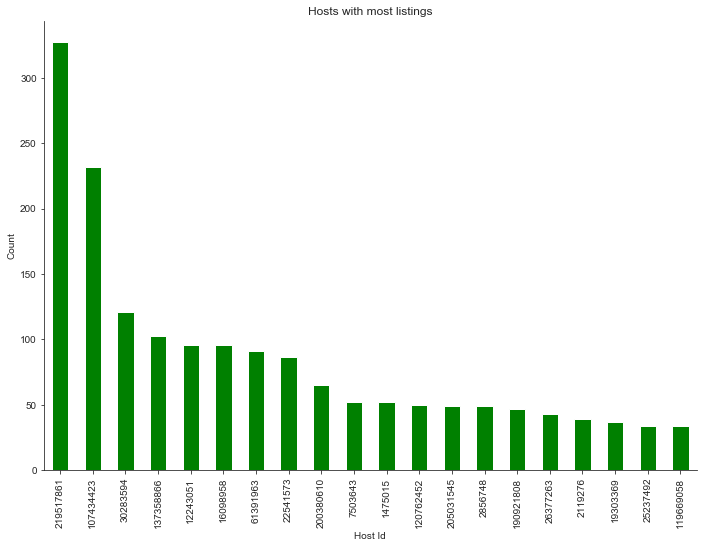

In [32]:
#Let us plot the top host using bar graph.
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
top_host.plot(kind='bar',color='Green')
plt.xlabel('Host Id')
plt.ylabel('Count')
plt.title('Hosts with most listings')
sns.despine()

In [33]:
#Let us find the most preferred neighbourhood.
pref_neigh2=airbnb.neighbourhood.value_counts().head(10)
pref_neigh2

Williamsburg          3917
Bedford-Stuyvesant    3709
Harlem                2656
Bushwick              2461
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1563
Midtown               1544
Name: neighbourhood, dtype: int64

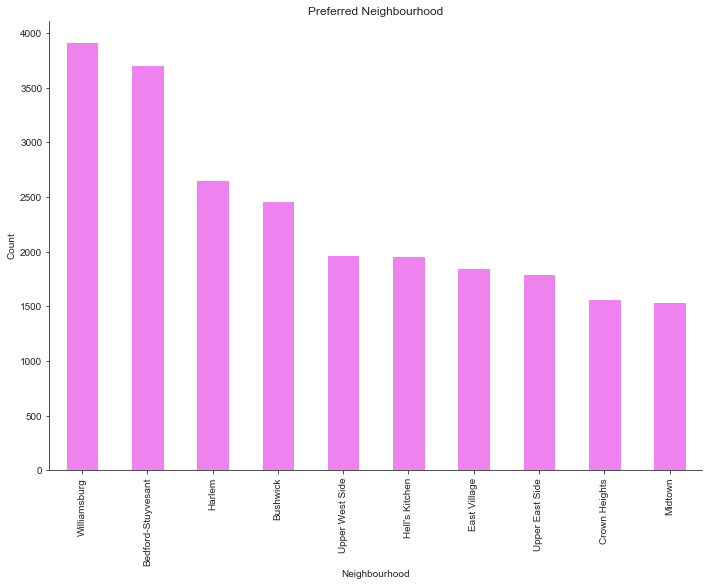

In [34]:
#Here we are using a bar graph to visualze the most preferred neighbourhood.
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
pref_neigh2.plot(kind='bar',color='Violet')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Preferred Neighbourhood')
sns.despine()

# Bivariate

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

In [35]:
#Here we will find out the mean, std and max price.
airbnb.price.describe()

count    48870.000000
mean       152.759402
std        240.199363
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

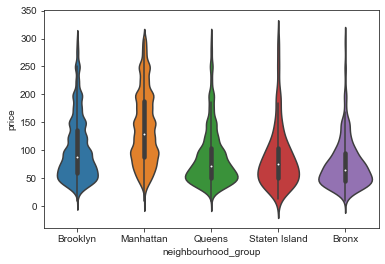

In [36]:
#Since the mean of the price is 152 we are making a subset of price i.e < 300.

price_subset=airbnb[airbnb.price < 300]
sns.violinplot(x='neighbourhood_group', y='price', data=price_subset, size=8)
plt.show()


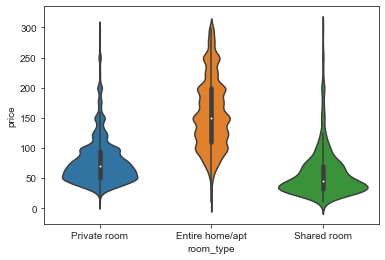

In [37]:
#Here we are plotting room type vs price.

price_subset=airbnb[airbnb.price < 300]
sns.violinplot(x='room_type', y='price', data=price_subset, size=8)
plt.show()


# Multivariate

Multivariate analysis (MVA) is based on the statistical principle of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

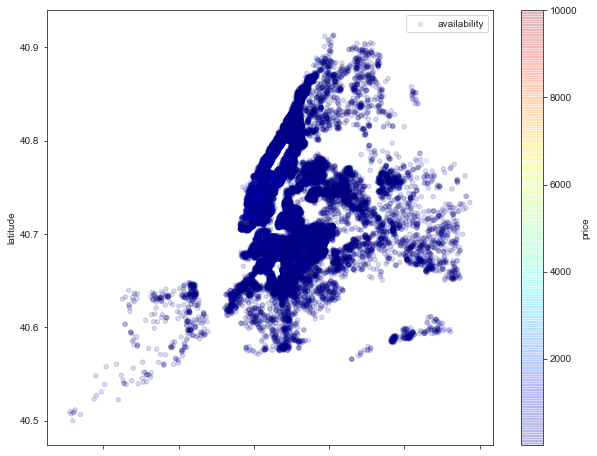

In [38]:
#This represents longitude and latitude across NYC and their price range.

pricevsneigh=airbnb.plot(kind='scatter', x='longitude', y='latitude', label='availability', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.15, figsize=(10,8))
pricevsneigh.legend()

## Machine Learning

**Machine learning** is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Machine learning focuses on the development of computer programs that can access data and use it learn for themselves. Machine learning algorithms are often categorized as supervised or unsupervised.
<br>
- Supervised machine learning algorithms can apply what has been learned in the past to new data using labeled examples to predict future events.
<br>

- In contrast, Unsupervised machine learning algorithms are used when the information used to train is neither classified nor labeled. Unsupervised learning studies how systems can infer a function to describe a hidden structure from unlabeled data.
<br>

- Semi-supervised machine learning algorithms fall somewhere in between supervised and unsupervised learning, since they use both labeled and unlabeled data for training – typically a small amount of labeled data and a large amount of unlabeled data.
<br>

- Reinforcement machine learning algorithms is a learning method that interacts with its environment by producing actions and discovers errors or rewards. Trial and error search and delayed reward are the most relevant characteristics of reinforcement learning.
<br>
<br>

Preprocessing and preparing Data for Prediction

In [25]:
#Load again the dataset from CSV file to avoid missing data, errors or other warnings.
airbnb=pd.read_csv('MAYA_NYC_2019.csv')

airbnb.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
airbnb['reviews_per_month']=airbnb['reviews_per_month'].replace(np.nan, 0)

In [26]:
#Encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()      

# Fit label encoder
le.fit(airbnb['neighbourhood_group'])
airbnb['neighbourhood_group']=le.transform(airbnb['neighbourhood_group']) 
# Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(airbnb['neighbourhood'])
airbnb['neighbourhood']=le.transform(airbnb['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(airbnb['room_type'])
airbnb['room_type']=le.transform(airbnb['room_type'])

airbnb.sort_values(by='price',ascending=True,inplace=True)

airbnb.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
25796,86327101,1,13,40.68258,-73.91284,1,0,1,95,4.35,6,222
25634,15787004,1,28,40.69467,-73.92433,1,0,2,16,0.71,5,0
25433,131697576,0,62,40.83296,-73.88668,1,0,2,55,2.56,4,127
25753,1641537,1,91,40.72462,-73.94072,1,0,2,12,0.53,2,0
23161,8993084,1,13,40.69023,-73.95428,1,0,4,1,0.05,4,28


In [12]:
#Reversing Labeling Transform
list(le.inverse_transform(airbnb['room_type']))[:10]

['Private room',
 'Private room',
 'Private room',
 'Private room',
 'Private room',
 'Private room',
 'Shared room',
 'Entire home/apt',
 'Private room',
 'Shared room']

## Modelling 
<br>

### Linear Regression

In [13]:
#Train LRM
lm = LinearRegression()

X = airbnb[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = airbnb['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


**Mean Squared Error:** Mean squared error regression loss, or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
<br>
**R^2 (coefficient of determination) Regression score function:** Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
<br>
**Mean absolute error regression loss:** Is a measure of difference between two continuous variables. Assume X and Y are variables of paired observations that express the same phenomenon.

In [14]:
# Get Predictions & Print Metrics'''
predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 180.73409656936255
        R2 Score: 11.639576782323635
        Mean Absolute Error: 72.86091366825487
     


### Gradient Boosted Regressor Model
<br>
Gradient Boosted (GB) builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [15]:
# Gradient Boosted Regressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
# Get Predictions & Metrics
predicts2 = GBoost.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts2)),
        r2_score(y_test,predicts2) * 100,
        mean_absolute_error(y_test,predicts2)
        ))


        Mean Squared Error: 175.4869327536262
        R2 Score: 16.695748086349216
        Mean Absolute Error: 63.93601525786786
     


### Results

**Predictions (Linear Regression Model)**

<br>
Actual Values VS Predicted Values

In [17]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error_airbnb.head(5)

,Actual Values,Predicted Values
0,400,135.112125
1,140,210.599057
2,195,176.222978
3,120,100.439183
4,88,88.545753


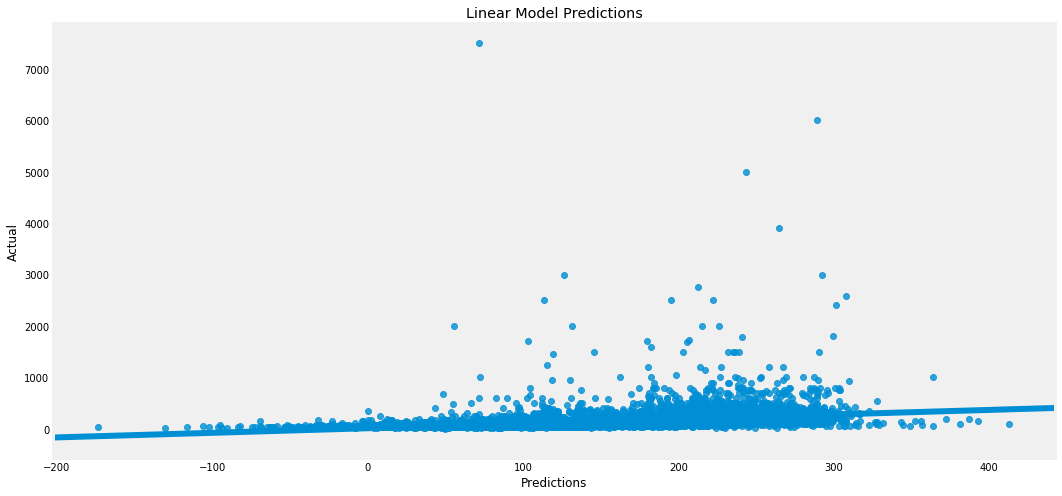

In [28]:
# --- Bar Plot for Predicted Values vs Actual Values---
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

# --- Prediction Model ---
plt.figure(figsize=(16,8))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

**Predictions 2 (Gradient Boosted Regressor Model)**
<br>

Actual Values VS Predicted Values

In [19]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts2.flatten()}).head(20)

error_airbnb.head(5)

,Actual Values,Predicted Values
0,400,125.903567
1,140,156.575618
2,195,161.337522
3,120,94.543442
4,88,71.978409


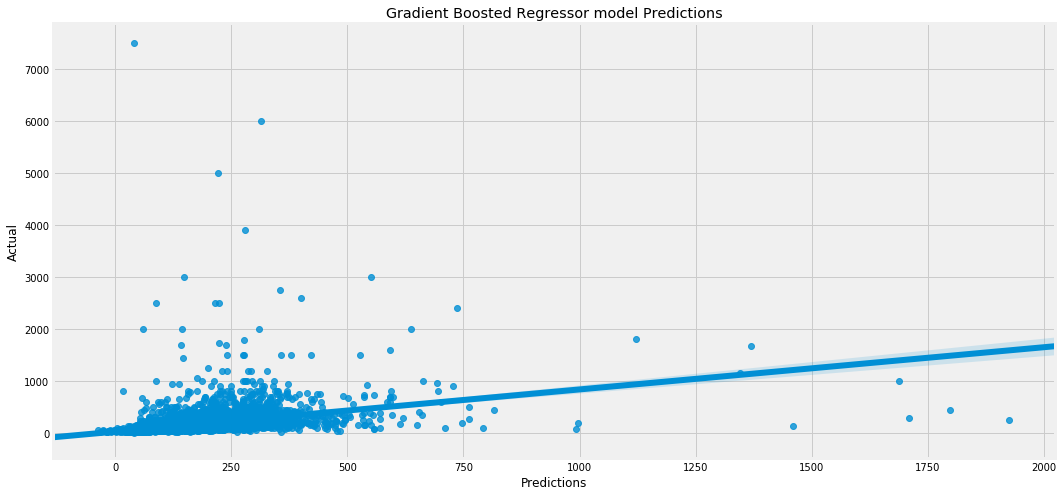

In [29]:
# --- Bar Plot for Predicted Values vs Actual Values---
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

# --- Prediction Model ---
plt.figure(figsize=(16,8))
sns.regplot(predicts2,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Gradient Boosted Regressor model Predictions")
plt.show()

In [1]:
airbnb=inputDF.groupby('room_type').id.count()


NameError: name 'inputDF' is not defined

## Conclusion 
We got into Predictive Analysis using the latest stack technology in order to predict the price of Airbnb's over the year. We have used Machine Learning as application of Artificial Intelligence (AI), and we also applied the most optimized and newest algorithms like: "Linear Regression Model" & "Gradient Boosted Regressor Model" where we got a positive results coming up with the generalized increase in prices in New York City.

## References and Citations:

https://www.datacamp.com/community/

https://www.edureka.co/blog/exploratory-data-analysis-in-python
